In [2]:
import numpy as np
import pandas as pd
from scipy import io
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.manifold as skman
import sklearn.decomposition as decomp
import umap
from sklearn import cluster
import hdbscan
from scipy import stats

datapath = '../Data'
tmpx = io.loadmat(f'{datapath}/Clifton/PatientData_final_withheaders.mat')

cat = 'AnyLong'
cmap = matplotlib.cm.get_cmap('viridis')

In [3]:
wlen = 14
wcutoff = 5

In [4]:
def plotAllProjections(data, labels=None):
    if labels is None:
        labels = np.ones(data.shape[0])
    #PCA
    pca = decomp.PCA()
    components = pca.fit_transform(data)
    #UMAP
    fit = umap.UMAP()
    u = fit.fit_transform(data)
    #t-SNE attempt
    data_embedded = skman.TSNE(n_components=2).fit_transform(data)
    data_embedded.shape

    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax = ax.ravel()
    ax[0].set_title('2-dimensional PCA plot')
    ax[0].scatter(components[:, 0], components[:, 1], c=labels, cmap='rainbow')
    ax[0].set_aspect('equal')
    ax[1].set_title('PCA variances')
    ax[1].semilogy(pca.explained_variance_)
    #UMAP
    ax[2].set_title('UMAP projection')
    ax[2].scatter(u[:, 0], u[:, 1], c=labels, cmap='rainbow')
    #t-SNE
    ax[3].set_title('t-SNE projection')
    ax[3].scatter(data_embedded[:, 0], data_embedded[:, 1], c=labels, cmap='rainbow')
    return components, u, data_embedded

In [5]:
def plotUMAP(data):
    fig, ax = plt.subplots(5, 6, figsize=(15,12))
    for i, md in enumerate([0.0, 0.01, 0.05, 0.1, 0.5, 1]):
        for j, nn in enumerate([5, 15, 30, 50, 100]):
            um = umap.UMAP(n_neighbors=nn, min_dist=md)
            u = um.fit_transform(data)
            ax[j, i].scatter(u[:, 0], u[:, 1])

In [6]:
def relabel(labels, window_df):
    labels = labels.astype(int)
    N = int(np.max(labels)+1)
    midlist = np.zeros((N,))
    for c in range(N):
        clist = np.where(labels == c)[0]
        painlist = np.array([])
        for a, g in window_df.groupby('Group'): # 'Group' represents which set of windowed data
            if a in clist:
                painlist = np.concatenate([painlist, g['Pain'].values])
        midlist[c] = np.mean(painlist.ravel())
    pairs = list(enumerate(midlist))
    sortlabels = sorted(pairs, key=lambda x: x[1])
    relabels = np.zeros(labels.shape)
    for new_l, (l, _) in enumerate(sortlabels):
        relabels = np.where(labels==l, new_l, relabels)
    return relabels

In [6]:
test_labels = all_labels[0, :]
print(test_labels)
relabel(test_labels, window_df)

NameError: name 'all_labels' is not defined

In [7]:
headers=[x[0] for x in tmpx['column_headers'][0]]
patient_list=[x for x in tmpx.keys() if 'Patient' in x]
for patient in patient_list:
    tmp=tmpx[patient]
    df=pd.DataFrame(tmp,columns=headers)
    df['Patient_ID']=patient
    collist=[df.columns[-1]]+list(df.columns[:-1])
    df=df[collist]
    if patient==patient_list[0]:
        patient_df=df.copy()
    else:
        patient_df=patient_df.append(df)
print(patient_df.columns)
display(patient_df.head())
print(len(patient_df))

Index(['Patient_ID', 'hours_in_week', 'days', 'female', 'SCD_dx', 'age',
       'On_Hu', 'On_FolicAcid', 'adult', 'age_group', 'VasPain',
       'ReportAnyMedAction', 'Long_Morphine_ER', 'Long_Methadone',
       'Long_Fentanyl_patch', 'Long_Oxycontin', 'Long_MS_Contin', 'Long_Opana',
       'Long_Oxymorphone', 'Long_Other', 'Short_Dilaudid', 'Short_Oxycodone',
       'Short_Percocet', 'Short_Morphine', 'Short_Other', 'Nonop_Ibuprofen',
       'Nonop_Tylenol', 'Nonop_Naproxen', 'Nonop_Excedrin', 'Nonop_Other',
       'AnyLong', 'AnyShort', 'AnyNonop', 'Clear', 'Cloudy', 'RainSnow'],
      dtype='object')


Patient_ID  hours_in_week      days  female  SCD_dx   age  On_Hu  \
0  PatientA0001       0.000000  0.000000     0.0     2.0  47.0    0.0   
1  PatientA0001       6.733889  0.280579     0.0     2.0  47.0    0.0   
2  PatientA0001       8.876389  0.369850     0.0     2.0  47.0    0.0   
3  PatientA0001      19.246667  0.801944     0.0     2.0  47.0    0.0   
4  PatientA0001      25.721389  1.071725     0.0     2.0  47.0    0.0   

   On_FolicAcid  adult  age_group  ...  Nonop_Tylenol  Nonop_Naproxen  \
0           1.0    1.0        3.0  ...            0.0             0.0   
1           1.0    1.0        3.0  ...            0.0             0.0   
2           1.0    1.0        3.0  ...            0.0             0.0   
3           1.0    1.0        3.0  ...            0.0             0.0   
4           1.0    1.0        3.0  ...            0.0             0.0   

   Nonop_Excedrin  Nonop_Other  AnyLong  AnyShort  AnyNonop  Clear  Cloudy  \
0             0.0          0.0      0.0       0.0       0.0    NaN     NaN   
1             0.0          0.0      0.0       0.0       0.0    NaN     NaN   
2             0.0          0.0      1.0       1.0       0.0    NaN     NaN   
3             0.0          0.0      1.0       1.0       0.0    NaN     NaN   
4             0.0          0.0      1.0       1.0       0.0    NaN     NaN   

   RainSnow  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 36 columns]

2620


In [8]:
nulls = np.where(patient_df['VasPain'].isnull())[0]

tdict = {}
paindict = {}
catdict = {}

for patient in patient_list:
    inds = np.where(np.logical_and(patient_df['Patient_ID']==patient, ~patient_df['VasPain'].isnull()))[0]
    time = patient_df['days'].iloc[inds]
    pain = patient_df['VasPain'].iloc[inds]
    catpt = np.max(patient_df[cat].iloc[inds])
    tdict[patient] = time.values
    paindict[patient] = pain.values
    catdict[patient] = catpt

In [9]:
window_df = pd.DataFrame(columns=['Group', 'Patient', 'Time', 'Pain', 't0'])

group = 0
for key in tdict.keys():
    t = tdict[key]
    pain = paindict[key]
    for tmax in np.arange(wlen, np.ceil(t[-1]/wlen)*wlen, wlen):
        tmin = tmax-wlen
        inds = np.where(np.logical_and(t>tmin, t<tmax))[0]
        datadict = {
            'Group':[group for _ in inds],
            'Patient':[key for _ in inds],
            'Time':t[inds]-tmin,
            'Pain':pain[inds],
            't0':tmin
            }
        if len(inds) > wcutoff:
            temp_df = pd.DataFrame(data=datadict, columns=['Group', 'Patient', 'Time', 'Pain', 't0'])
            window_df = pd.concat([window_df, temp_df], axis='index')
            group += 1

In [10]:
ptnum = {}
for j, patient in enumerate(sorted(patient_list)):
    ptnum[patient] = j
windowed = np.zeros((group, 7))
for a, g in window_df.groupby('Group'):
    pain = g['Pain']
    windowed[a, 0] = np.mean(pain)/10
    windowed[a, 1] = np.std(pain)/5
    windowed[a, 2] = len(np.where(pain<=3)[0])/len(pain)
    windowed[a, 3] = len(np.where(pain>=8)[0])/len(pain)
    windowed[a, 4] = np.mean(np.gradient(pain))
    windowed[a, 5] = ptnum[g['Patient'][0]]
    windowed[a, 6] = catdict[g['Patient'][0]]

ZeroDivisionError: integer division or modulo by zero

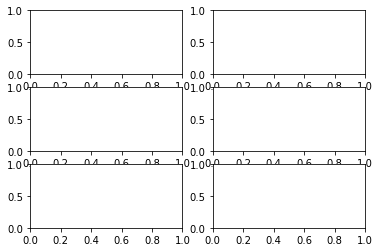

In [17]:
data = windowed[:, :-2]
num_trials = 1
num_samples = len(windowed[:, 0])
all_labels = np.zeros((num_trials, num_samples))

fig, ax = plt.subplots(3, 2)
ax = ax.ravel()
i = 0
for trial in range(num_trials):
    #UMAP
    fit = umap.UMAP(min_dist=0.001, n_neighbors=20)
    u = fit.fit_transform(data)
    u = u/np.std(u)
    clustering = cluster.SpectralClustering(n_clusters=3).fit(u)
    all_labels[trial, :] = relabel(clustering.labels_, window_df)
    if trial%(num_trials//6) == 0:
        ax[i].scatter(u[:, 0], u[:, 1], c=all_labels[trial, :])
        i += 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1.]


(array([ 56.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.]),
 array([1.        , 1.03225806, 1.06451613, 1.09677419, 1.12903226,
        1.16129032, 1.19354839, 1.22580645, 1.25806452, 1.29032258,
        1.32258065, 1.35483871, 1.38709677, 1.41935484, 1.4516129 ,
        1.48387097, 1.51612903, 1.5483871 , 1.58064516, 1.61290323,
        1.64516129, 1.67741935, 1.70967742, 1.74193548, 1.77419355,
        1.80645161, 1.83870968, 1.87096774, 1.90322581, 1.93548387,
        1.96774194, 2.        ]),
 <BarContainer object of 31 artists>)

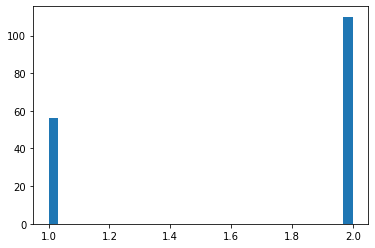

In [18]:
counts = np.zeros((num_samples,))
for k in range(num_samples):
    counts[k] = np.sum(all_labels[:, k]==stats.mode(all_labels[:, k]))/num_trials
print(counts)
plt.hist(counts, bins=31)

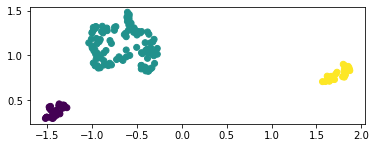

In [27]:
plt.scatter(u[:, 0], u[:, 1], c=all_labels.ravel(), cmap=cmap)
plt.gca().set_aspect('equal')
plt.savefig('../Figures/UMAPexample.eps')


 Group 1
5th percentile: 0.0
10th percentile: 0.0
25th percentile: 0.0
50th percentile: 0.0
75th percentile: 1.75
90th percentile: 2.620000000000002
95th percentile: 3.2

 Group 2
5th percentile: 0.0
10th percentile: 1.4
25th percentile: 2.8
50th percentile: 4.3
75th percentile: 6.0
90th percentile: 7.5
95th percentile: 8.1

 Group 3
5th percentile: 7.7
10th percentile: 8.0
25th percentile: 8.4
50th percentile: 8.8
75th percentile: 9.3
90th percentile: 10.0
95th percentile: 10.0


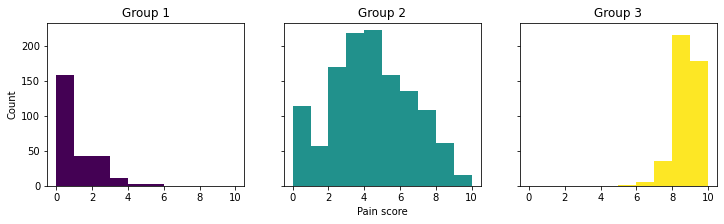

In [20]:
N = 3

fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)

for c in range(N):
    clist = np.where(stats.mode(all_labels).mode.ravel() == c)[0]
    painlist = np.array([])
    for a, g in window_df.groupby('Group'):
        if a in clist:
            painlist = np.concatenate([painlist, g['Pain'].values])
    ax[c].hist(painlist, bins=list(range(11)), color=cmap(c/(N-1)))
    ax[c].set_title(f'Group {c+1}')
    print('\n',f'Group {c+1}')
    for p in [5, 10, 25, 50, 75, 90, 95]:
        print(f'{p}th percentile: {np.percentile(painlist, p)}')
ax[1].set_xlabel('Pain score')
ax[0].set_ylabel('Count')
plt.savefig('../Figures/GroupHistograms.eps', transparent=True, bbox_inches='tight')

Patient_ID             PatientB1006
hours_in_week                     0
days                              0
female                            0
SCD_dx                            1
age                              24
On_Hu                             1
On_FolicAcid                      0
adult                             1
age_group                         2
VasPain                           0
ReportAnyMedAction                1
Long_Morphine_ER                  0
Long_Methadone                    0
Long_Fentanyl_patch               0
Long_Oxycontin                    0
Long_MS_Contin                    0
Long_Opana                        0
Long_Oxymorphone                  0
Long_Other                        0
Short_Dilaudid                    0
Short_Oxycodone                   0
Short_Percocet                    0
Short_Morphine                    0
Short_Other                       0
Nonop_Ibuprofen                   0
Nonop_Tylenol                     0
Nonop_Naproxen              

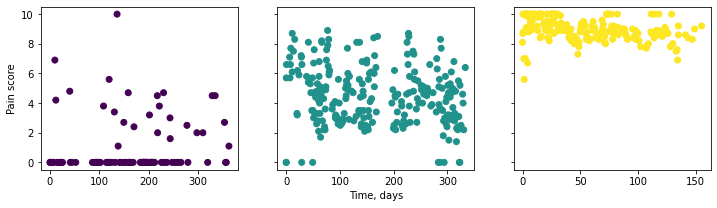

In [21]:
N = 3
fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)
for c in range(N):
    clist = np.where(stats.mode(all_labels).mode.ravel() == c)[0]
    cluster_center = np.mean(u[clist, :], axis=0)
    u_c = u[clist, :] - cluster_center
    closest = clist[np.argmin(np.sqrt(np.sum(u_c**2, axis=-1)))]
    closest_patient = window_df[window_df['Group'] == closest]['Patient'][0]
    print(patient_df[patient_df['Patient_ID'] == closest_patient].iloc[0])
    ax[c].scatter(tdict[closest_patient], paindict[closest_patient], c=c*np.ones(len(tdict[closest_patient])), vmin=0, vmax=2)
ax[1].set_xlabel('Time, days')
ax[0].set_ylabel('Pain score')
plt.savefig('../Figures/ExampleTrajectories.eps', transparent=True, bbox_inches='tight')

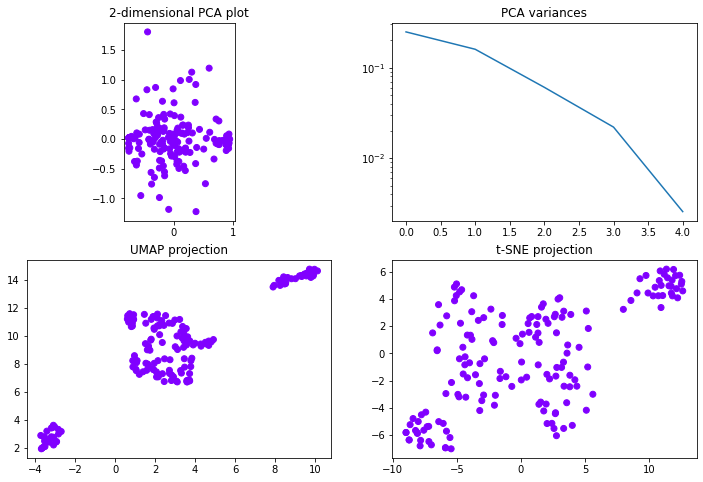

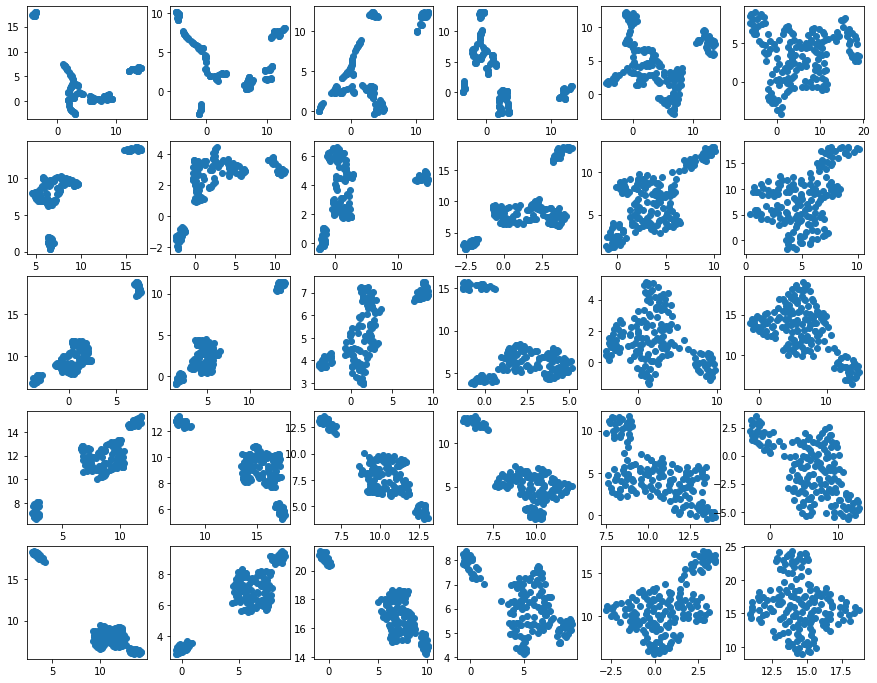

In [17]:
data = windowed[:, :-2]
pca, um, tsne = plotAllProjections(data, labels=None)
plotUMAP(data)

In [18]:
hist_data = np.zeros((group, 12))
for a, g in window_df.groupby('Group'):
    pain = g['Pain']
    hist_data[a, :-2], _ = np.histogram(pain, bins=list(range(11)), density=True)
    hist_data[a, -2] = ptnum[g['Patient'][0]]
    hist_data[a, -1] = catdict[g['Patient'][0]]

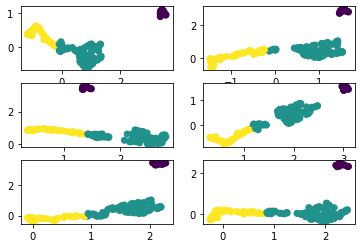

In [19]:
data = hist_data[:, :-2]
num_trials = 30
num_samples = len(windowed[:, 0])
all_labels = np.zeros((num_trials, num_samples))

fig, ax = plt.subplots(3, 2)
ax = ax.ravel()
i = 0
for trial in range(num_trials):
    #UMAP
    fit = umap.UMAP(min_dist=0.01, n_neighbors=15, metric='manhattan')
    u = fit.fit_transform(data)
    u = u/np.std(u)
    clustering = cluster.SpectralClustering(n_clusters=3).fit(u)
    all_labels[trial, :] = relabel(clustering.labels_, window_df)
    if trial%(num_trials//6) == 0:
        ax[i].scatter(u[:, 0], u[:, 1], c=all_labels[trial, :])
        i += 1

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.66666667 1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.93333333 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.93333333 0.93333333
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.93333333 1.         1.         1.
 0.66666667 0.96666667 0.9        1.         1.         0.93333333
 1.         1.         1.         1.         1.         0.93333333
 1.         1.         0.93333333 1.         1.         1.
 1.         1.         0.9333333

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   9.,   0.,   0.,   1.,   0.,   0., 147.]),
 array([0.66666667, 0.67741935, 0.68817204, 0.69892473, 0.70967742,
        0.72043011, 0.7311828 , 0.74193548, 0.75268817, 0.76344086,
        0.77419355, 0.78494624, 0.79569892, 0.80645161, 0.8172043 ,
        0.82795699, 0.83870968, 0.84946237, 0.86021505, 0.87096774,
        0.88172043, 0.89247312, 0.90322581, 0.91397849, 0.92473118,
        0.93548387, 0.94623656, 0.95698925, 0.96774194, 0.97849462,
        0.98924731, 1.        ]),
 <BarContainer object of 31 artists>)

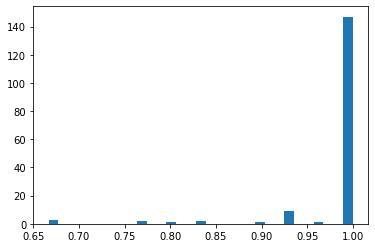

In [20]:
counts = np.zeros((num_samples,))
for k in range(num_samples):
    counts[k] = np.sum(all_labels[:, k]==stats.mode(all_labels[:, k]))/num_trials
print(counts)
plt.hist(counts, bins=31)


 Group 1
5th percentile: 0.0
10th percentile: 0.0
25th percentile: 0.0
50th percentile: 0.0
75th percentile: 0.0
90th percentile: 1.8599999999999994
95th percentile: 3.2

 Group 2
5th percentile: 0.0
10th percentile: 1.2
25th percentile: 2.5
50th percentile: 3.8
75th percentile: 5.1
90th percentile: 6.700000000000001
95th percentile: 7.5

 Group 3
5th percentile: 6.324999999999999
10th percentile: 6.8
25th percentile: 7.9
50th percentile: 8.6
75th percentile: 9.1
90th percentile: 10.0
95th percentile: 10.0


Text(0, 0.5, 'Count')

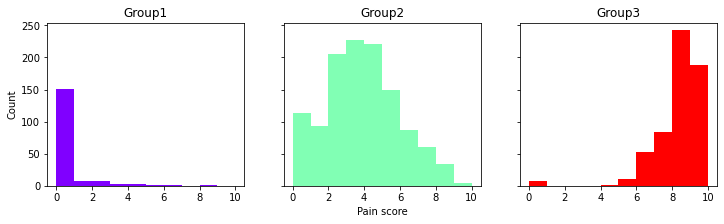

In [21]:
N = 3
fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)
for c in range(N):
    clist = np.where(stats.mode(all_labels).mode.ravel() == c)[0]
    painlist = np.array([])
    for a, g in window_df.groupby('Group'):
        if a in clist:
            painlist = np.concatenate([painlist, g['Pain'].values])
    ax[c].hist(painlist, bins=list(range(11)), color=cmap(c/(N-1)))
    ax[c].set_title(f'Group{c+1}')
    print('\n',f'Group {c+1}')
    for p in [5, 10, 25, 50, 75, 90, 95]:
        print(f'{p}th percentile: {np.percentile(painlist, p)}')
ax[1].set_xlabel('Pain score')
ax[0].set_ylabel('Count')

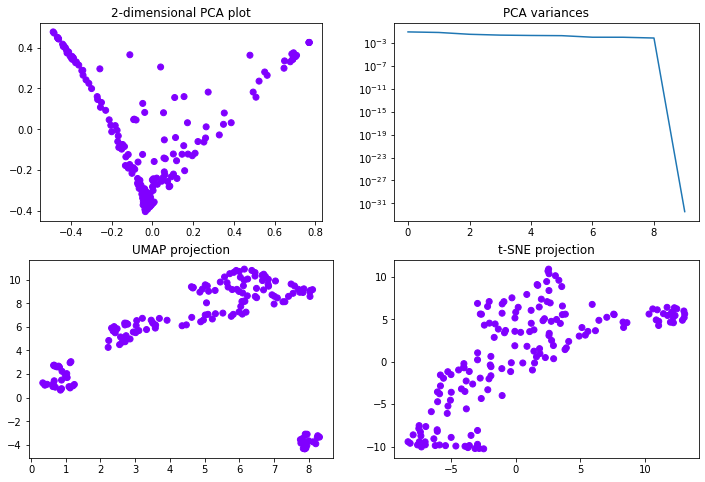

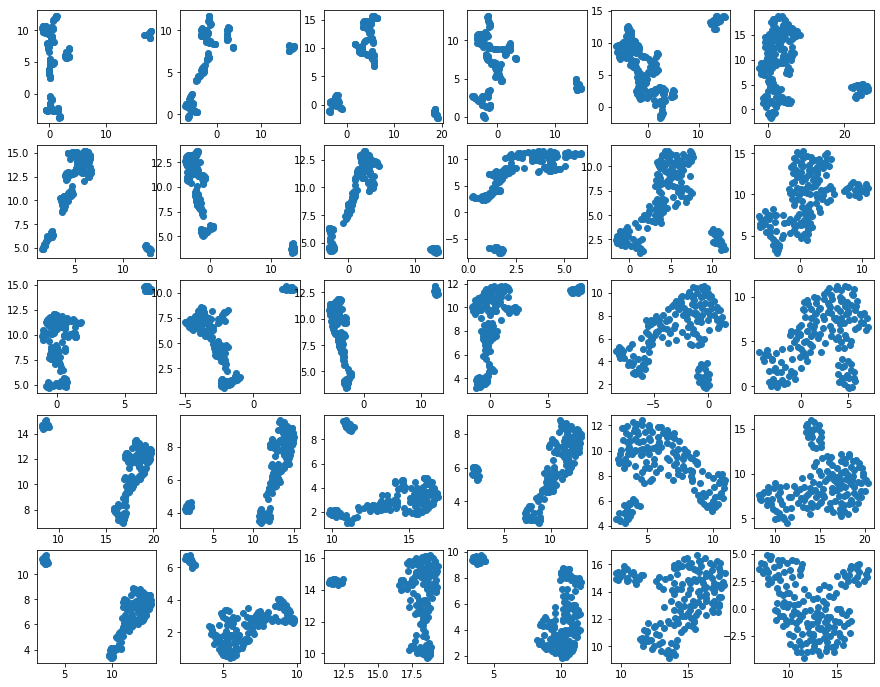

In [22]:
data = hist_data[:, :-2]
pca, um, tsne = plotAllProjections(data, labels=None)
plotUMAP(data)

In [23]:
cent_hist = np.zeros((group, 14))
for a, g in window_df.groupby('Group'):
    pain = g['Pain']
    pmin = np.min(pain)
    pmax = np.max(pain)
    pain -= np.mean(pain)
    pain /= np.max(np.abs(pain))
    cent_hist[a, :-4], _ = np.histogram(pain, bins=10, range=(-1, 1), density=False)
    cent_hist[a, -4] = pmin
    cent_hist[a, -3] = pmax
    cent_hist[a, -2] = ptnum[g['Patient'][0]]
    cent_hist[a, -1] = catdict[g['Patient'][0]]

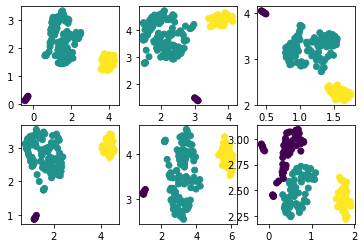

In [24]:
data = cent_hist[:, :-2]
num_trials = 60
num_samples = len(windowed[:, 0])
all_labels = np.zeros((num_trials, num_samples))

fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
i = 0
for trial in range(num_trials):
    #UMAP
    fit = umap.UMAP(min_dist=0.001, n_neighbors=20)
    u = fit.fit_transform(data)
    u = u/np.std(u)
    clustering = cluster.SpectralClustering(n_clusters=3).fit(u)
    all_labels[trial, :] = relabel(clustering.labels_, window_df)
    if trial%(num_trials//6) == 0:
        ax[i].scatter(u[:, 0], u[:, 1], c=all_labels[trial, :])
        i += 1

In [25]:
counts = np.zeros((num_samples,))
for k in range(num_samples):
    counts[k] = np.sum(all_labels[:, k]==stats.mode(all_labels[:, k]))
print(counts)

[59. 60. 60. 60. 60. 60. 60. 60. 60. 60. 56. 59. 57. 60. 60. 60. 57. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 55. 59. 59. 59. 56. 57. 57. 56. 57.
 59. 59. 55. 55. 55. 59. 57. 55. 60. 56. 59. 56. 55. 58. 59. 57. 57. 57.
 56. 59. 56. 56. 56. 56. 56. 57. 57. 59. 59. 57. 56. 59. 56. 54. 52. 56.
 56. 56. 57. 58. 56. 55. 59. 57. 59. 59. 58. 57. 55. 56. 57. 56. 55. 57.
 57. 55. 57. 56. 56. 59. 57. 58. 59. 59. 59. 58. 56. 55. 56. 56. 55. 52.
 52. 57. 55. 52. 57. 56. 59. 60. 57. 59. 60. 60. 57. 60. 60. 56. 60. 60.
 60. 60. 57. 59. 57. 57. 52. 57. 57. 55. 57. 60. 60. 60. 60. 60. 60. 60.
 56. 56. 59. 60. 57. 59. 56. 59. 59. 59. 59. 56. 59. 59. 55. 59. 56. 55.
 57. 57. 55. 55.]


In [26]:
stats.mode(all_labels).mode

array([[1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 2., 2., 2., 2., 2., 2., 2.,
        1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1.]])


 Group 1
5th percentile: 0.0
10th percentile: 0.0
25th percentile: 0.0
50th percentile: 0.0
75th percentile: 0.0
90th percentile: 0.3800000000000054
95th percentile: 2.269999999999996

 Group 2
5th percentile: 0.0
10th percentile: 0.0
25th percentile: 2.2
50th percentile: 3.8
75th percentile: 5.4
90th percentile: 7.299999999999999
95th percentile: 8.3

 Group 3
5th percentile: 6.6
10th percentile: 7.11
25th percentile: 8.0
50th percentile: 8.7
75th percentile: 9.1
90th percentile: 9.7
95th percentile: 10.0


Text(0, 0.5, 'Count')

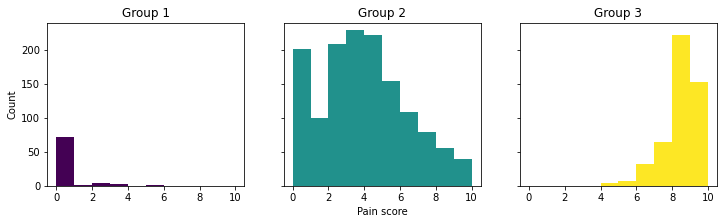

In [27]:
N = 3
fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)
cmap = matplotlib.cm.get_cmap('viridis')
for c in range(N):
    clist = np.where(stats.mode(all_labels).mode.ravel() == c)[0]
    painlist = np.array([])
    for a, g in window_df.groupby('Group'):
        if a in clist:
            painlist = np.concatenate([painlist, g['Pain'].values])
    ax[c].hist(painlist, bins=list(range(11)), color=cmap(c/(N-1)))
    ax[c].set_title(f'Group {c+1}')
    print('\n',f'Group {c+1}')
    for p in [5, 10, 25, 50, 75, 90, 95]:
        print(f'{p}th percentile: {np.percentile(painlist, p)}')
ax[1].set_xlabel('Pain score')
ax[0].set_ylabel('Count')

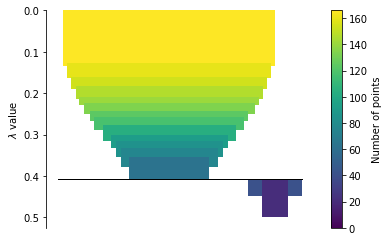

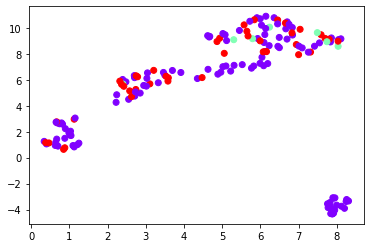

In [28]:
u = um

kmeans = cluster.DBSCAN(eps=0.28).fit(hist_data[:, :-2])
clusterer = hdbscan.HDBSCAN(min_cluster_size=8)
labels = clusterer.fit_predict(data[:, :-2])
hierarchy = clusterer.condensed_tree_
hierarchy.plot()
plt.figure()
plt.scatter(u[:, 0], u[:, 1], c=labels, cmap='rainbow')

In [29]:

labels = relabel(kmeans.labels_, window_df)

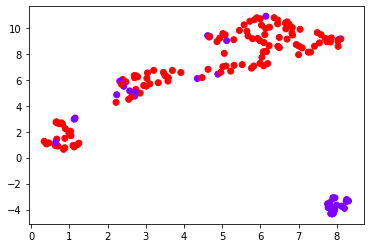

In [30]:
plt.scatter(u[:, 0], u[:, 1], c=labels, cmap='rainbow')

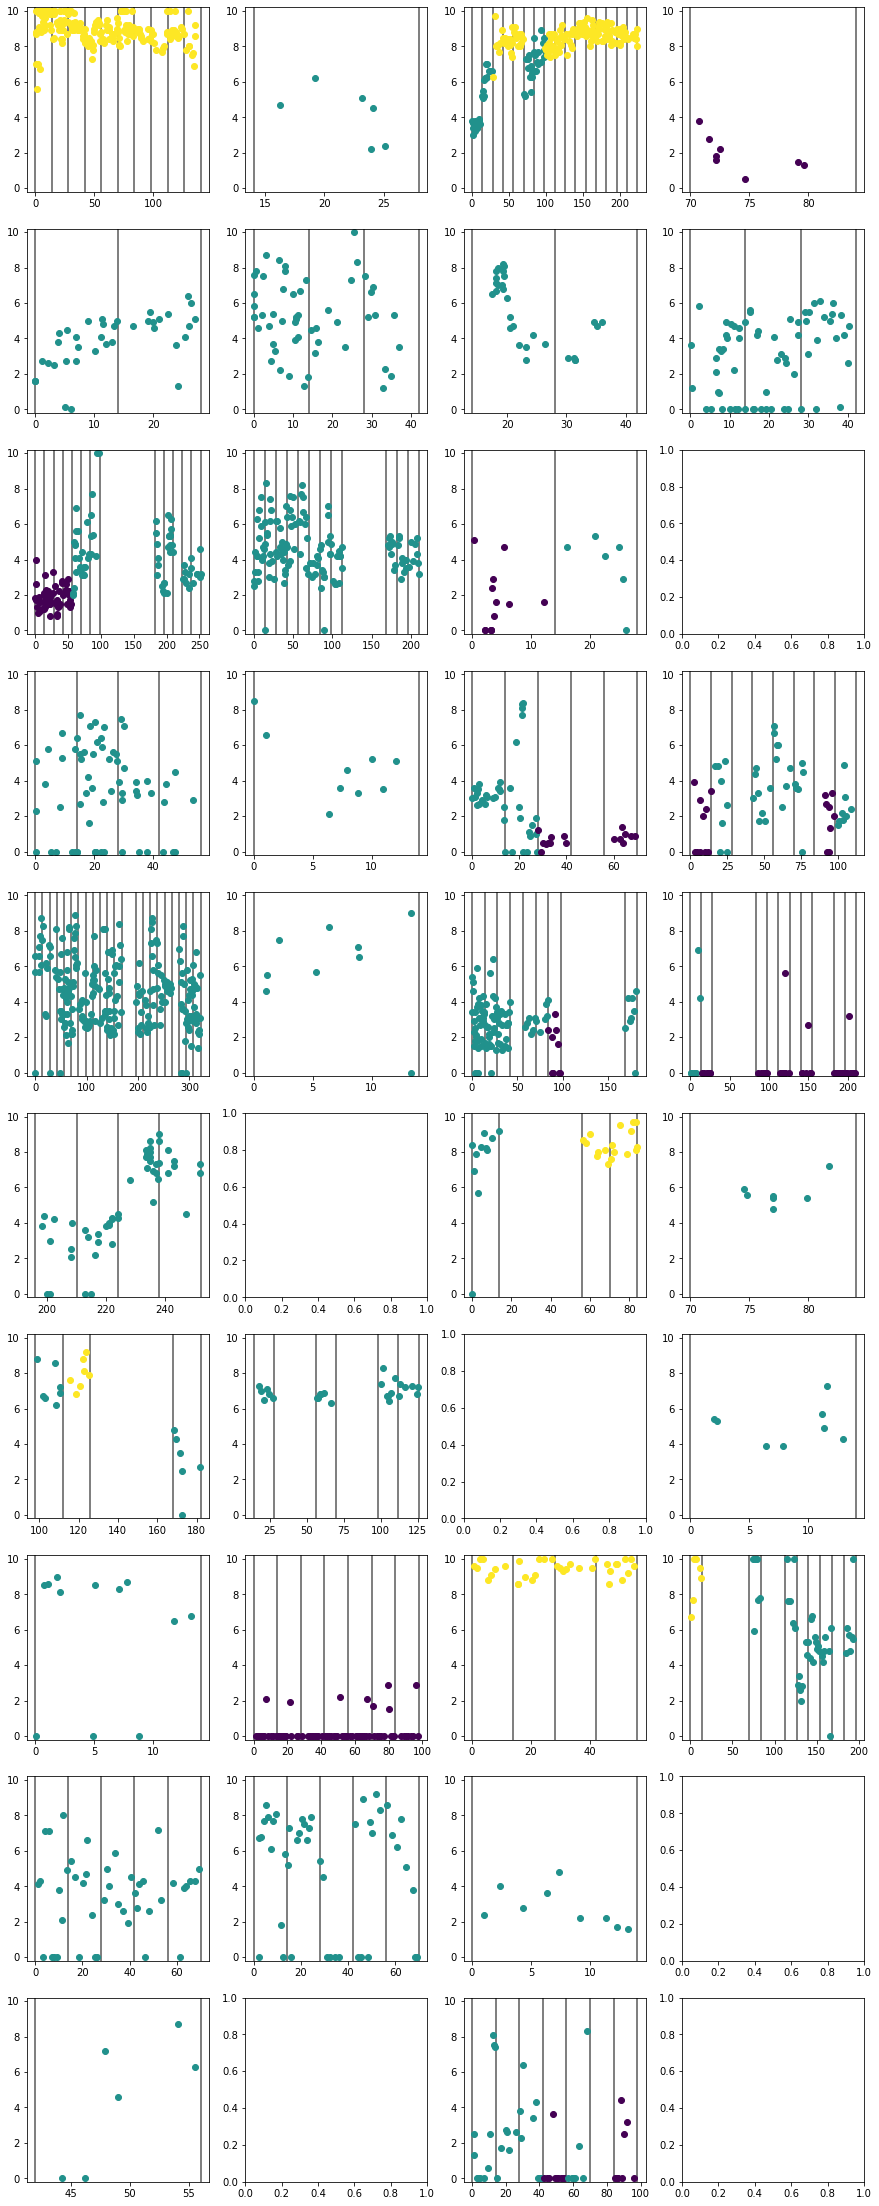

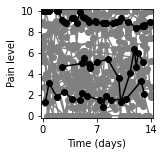

In [29]:
fig, ax = plt.subplots(10, 4, figsize=(15, 40))
ax = ax.ravel()
labels = all_labels.ravel()
fig2, ax2 = plt.subplots(figsize=(2,2))

# for key, axi in zip(patient_list, ax.ravel()[:-1]):
#     axi.scatter(tdict[key], paindict[key], c=catdict[key]*np.ones(tdict[key].shape), cmap='bwr', vmin=0, vmax=1)
# ax.ravel()[-1].axis('off')
i1 = np.where(labels==0)[0][2]
i2 = np.where(labels==1)[0][6]
i3 = np.where(labels==2)[0][2]

for a, g in window_df.groupby('Group'):
    pat = g['Patient'].values[0]
    p = ptnum[pat]
    label = labels[a]
    ax[p].scatter(g['Time']+g['t0'], g['Pain'], color=cmap(label/(N-1)))
    ax[p].plot([g['t0'], g['t0']], [-1, 11], 'gray', zorder=-2)
    ax[p].plot([g['t0']+wlen, g['t0']+wlen], [-1, 11], 'gray', zorder=-2)
    ax[p].set_ylim((-0.2, 10.2))
    if a in [i1,i2,i3]:
        ax2.plot(g['Time'], g['Pain'], '-o', color='k', zorder=2)
    elif a%5==0:
        ax2.plot(g['Time'], g['Pain'], '-o', color='gray', zorder=1)        
ax2.set_xlim(-0.2, wlen+0.2)
ax2.set_ylim(-0.2, 10.2)
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Pain level')
ax2.set_xticks([0, 7, 14])
ax2.set_yticks([0, 2, 4, 6, 8, 10])
plt.sca(ax2)
plt.savefig('../Figures/ExampleSamples.eps', transparent=True, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)

for c in range(N):
    clist = np.where(labels == c)[0]
    painlist = np.array([])
    for a, g in window_df.groupby('Group'):
        if a in clist:
            painlist = np.concatenate([painlist, g['Pain'].values])
    ax[c].hist(painlist, bins=list(range(11)), color=cmap(c/(N-1)))
    ax[c].set_title(f'Group {c}')
    print('\n',f'Group {c}')
    for p in [5, 10, 25, 50, 75, 90, 95]:
        print(f'{p}th percentile: {np.percentile(painlist, p)}')
ax[1].set_xlabel('Pain score')
ax[0].set_ylabel('Count')

## Increasing number of clusters to look at transitions

In [ ]:
for N in range(1, 6):
    u = um

    kmeans = cluster.KMeans(n_clusters=N).fit(data)
    kmeans.labels_
    plt.figure()
    plt.scatter(u[:, 0], u[:, 1], c=kmeans.labels_, cmap='rainbow')
    print(kmeans.labels_)
    len(np.where(kmeans.labels_==0)[0])

In [ ]:
fig, ax = plt.subplots(1, N, figsize=(12, 3), sharey=True)
for c in range(N):
    clist = np.where(kmeans.labels_ == c)[0]
    painlist = np.array([])
    for a, g in window_df.groupby('Group'):
        if a in clist:
            painlist = np.concatenate([painlist, g['Pain'].values])
    ax[c].hist(painlist, bins=list(range(11)), color=cmap(c/(N-1)))
    ax[c].set_title(f'Group {c+1}')
    print('\n',f'Group {c+1}')
    for p in [5, 10, 25, 50, 75, 90, 95]:
        print(f'{p}th percentile: {np.percentile(painlist, p)}')
ax[1].set_xlabel('Pain score')
ax[0].set_ylabel('Count')

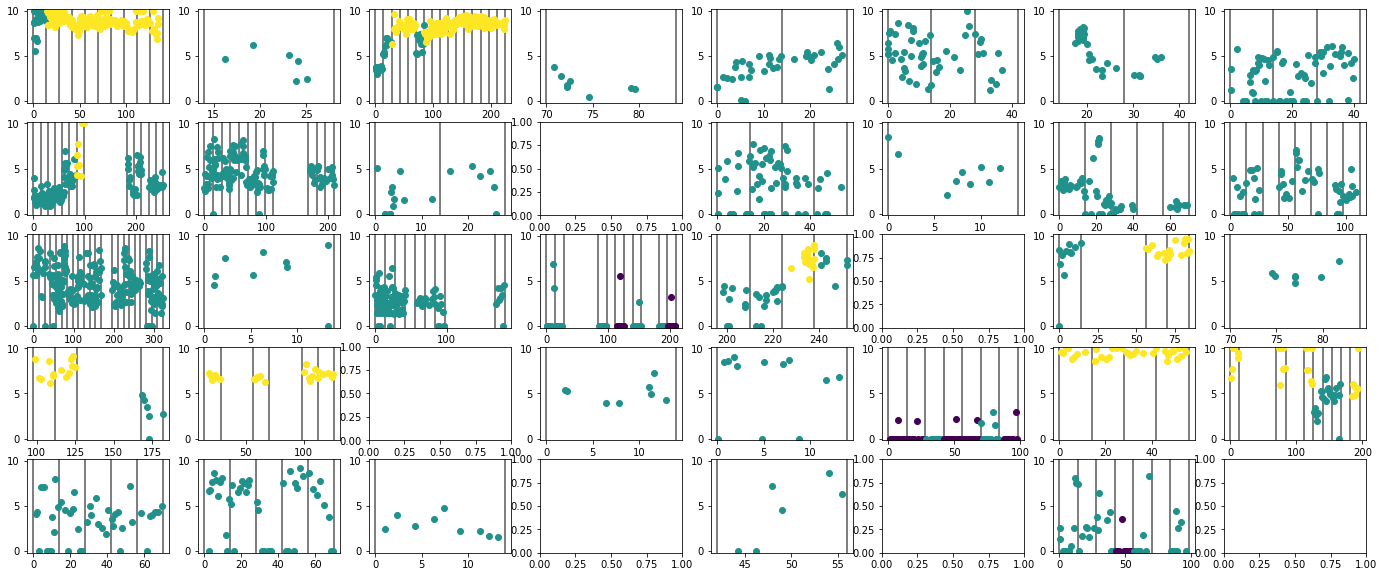

In [34]:
fig, ax = plt.subplots(5, 8, figsize=(24, 10))
ax = ax.ravel()

transitions = np.zeros((N, N))
lastt0 = -28
lastlabel = 0
for a, g in window_df.groupby('Group'):
    pat = g['Patient'].values[0]
    p = ptnum[pat]
    label = int(labels[a])
    ax[p].scatter(g['Time']+g['t0'], g['Pain'], color=cmap(label/(N-1)))
    ax[p].plot([g['t0'], g['t0']], [-1, 11], 'gray', zorder=-2)
    ax[p].plot([g['t0']+wlen, g['t0']+wlen], [-1, 11], 'gray', zorder=-2)
    ax[p].set_ylim((-0.2, 10.2))
    if (g['t0'][0]-lastt0)//wlen == 1:
        transitions[lastlabel, label] += 1
    lastlabel = label
    lastt0 = g['t0'][0]

NameError: name 'transitions' is not defined

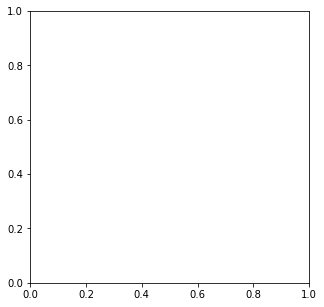

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pcolor(transitions, edgecolor='k', linewidth=2, cmap='Blues')
ax.invert_yaxis()
for i in range(N):
    for j in range(N):
        t = transitions[i, j]
        ax.text(j+0.3, i+0.6, f'{t:2.0f}', fontsize=12)
ax.set_xticks([])
ax.set_yticks([]);

## Looking at demographic, medication, and even weather data, for each cluster

In [32]:
patient_headers = list(patient_df.columns[3:9])
window_headers = list(patient_df.columns[11:])
all_headers = ['Group', 'Patient', 't0', 'Cluster']+patient_headers+window_headers

wlen = 14
wcutoff = 5
labels = stats.mode(all_labels).mode.ravel()

group = 0
group_df = pd.DataFrame(columns=all_headers)
for a, g in patient_df.groupby('Patient_ID'):
    patient = g['Patient_ID'][0]
    nulls = g['VasPain'].isnull().values
    gdata = g.iloc[~nulls]
    t = gdata['days'].values
    for tmax in np.arange(wlen, np.ceil(t[-1]/wlen)*wlen, wlen):
        tmin = tmax-wlen
        inds = np.where(np.logical_and(t>tmin, t<tmax))[0]
        
        if len(inds) > wcutoff:
            temp_dict = {'Group':group,
                         't0': tmin, 
                         'Patient':patient,
                         'Cluster':labels[group]
                        }
            for h in patient_headers:
                temp_dict[h] = gdata[h].values[0]
            for h in window_headers:
                temp_dict[h] = np.nansum(gdata[h].values[inds])/wlen
            temp_df = pd.DataFrame(index=[group], data=temp_dict, columns=all_headers)
            group_df = pd.concat([group_df, temp_df], axis='index')
            group += 1

In [ ]:
from sklearn import svm
from sklearn import model_selection as select


X = group_df[patient_headers+window_headers].values
y = labels

X_train, X_test, y_train, y_test = select.train_test_split(X, y, test_size=0.3)

clf = svm.SVC(kernel='linear')
scores = select.cross_val_score(clf, X_train, y_train, cv=5)
display(scores)

In [ ]:
help(umap)